In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import numpy as np
import pandas as pd
import os
import sys
import librosa


parent = os.path.abspath(os.path.join('..'))
sys.path.append(parent)

In [31]:
def read_audio_file(file_path, sr=None):
    try:
        audio_data, sampling_rate = librosa.load(file_path, sr=sr)
        return audio_data, sampling_rate
    except Exception as e:
        print(f"Error reading audio file: {e}")
        return None, None


def downsample_audio(audio, original_sr, target_sr):
    return librosa.resample(audio, orig_sr=original_sr, target_sr=target_sr)


def audio_to_melspectrogram(audio, sampling_rate, hop_length=256, n_fft=2048):
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, hop_length=hop_length, n_fft=n_fft)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram


def cut_random_segment(audio, segment_size):
    max_start_time = max(0, len(audio) - segment_size)
    start_time = np.random.randint(0, max_start_time)
    return audio[start_time:(start_time + segment_size)]


def show_melspectrogram(spectrogram, sampling_rate, title='log-frequency power spectrogram'):
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sampling_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()


def show_signal(audio):
    plt.plot(audio)
    plt.title('Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()


def read_as_melspectrogram(file_path):
    audio, sampling_rate = read_audio_file(file_path)
    spectrogram = audio_to_melspectrogram(audio, sampling_rate)
    return spectrogram

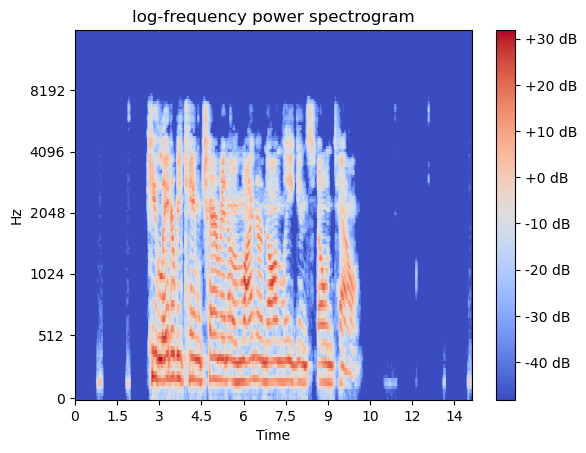

In [33]:
audio_path = '/home/klig/Datasets/cv-corpus-14.0-delta-2023-06-23/en/clips/common_voice_en_37285574.mp3'
audio, sampling_rate = read_audio_file(audio_path)
spectrogram = audio_to_melspectrogram(audio, sampling_rate, hop_length=256)
show_melspectrogram(spectrogram, sampling_rate)